In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# EDA

## Загрузим данные и посмотрим на них глазами

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

#### Охарактеризуем данные по типу:
Дискретные числовые — p_class, sib_sp, parch, has_cabin

Непрерывные числовые — age, fare

Категориальные — sex, embarked, name, ticket


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### Сразу приведем название колонок в соответствие с принятыми принципами и для удобства работы

In [6]:
data.columns = ['id', 'survived', 'p_class', 'name', 'sex', 'age', 'sib_sp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked']

data.columns

Index(['id', 'survived', 'p_class', 'name', 'sex', 'age', 'sib_sp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

### Построим попарные графики во взаимосвязи с таргетом и визуально посмотрим наличие/отсутсвие зависимостей между фичами, а также между фичами и таргетом

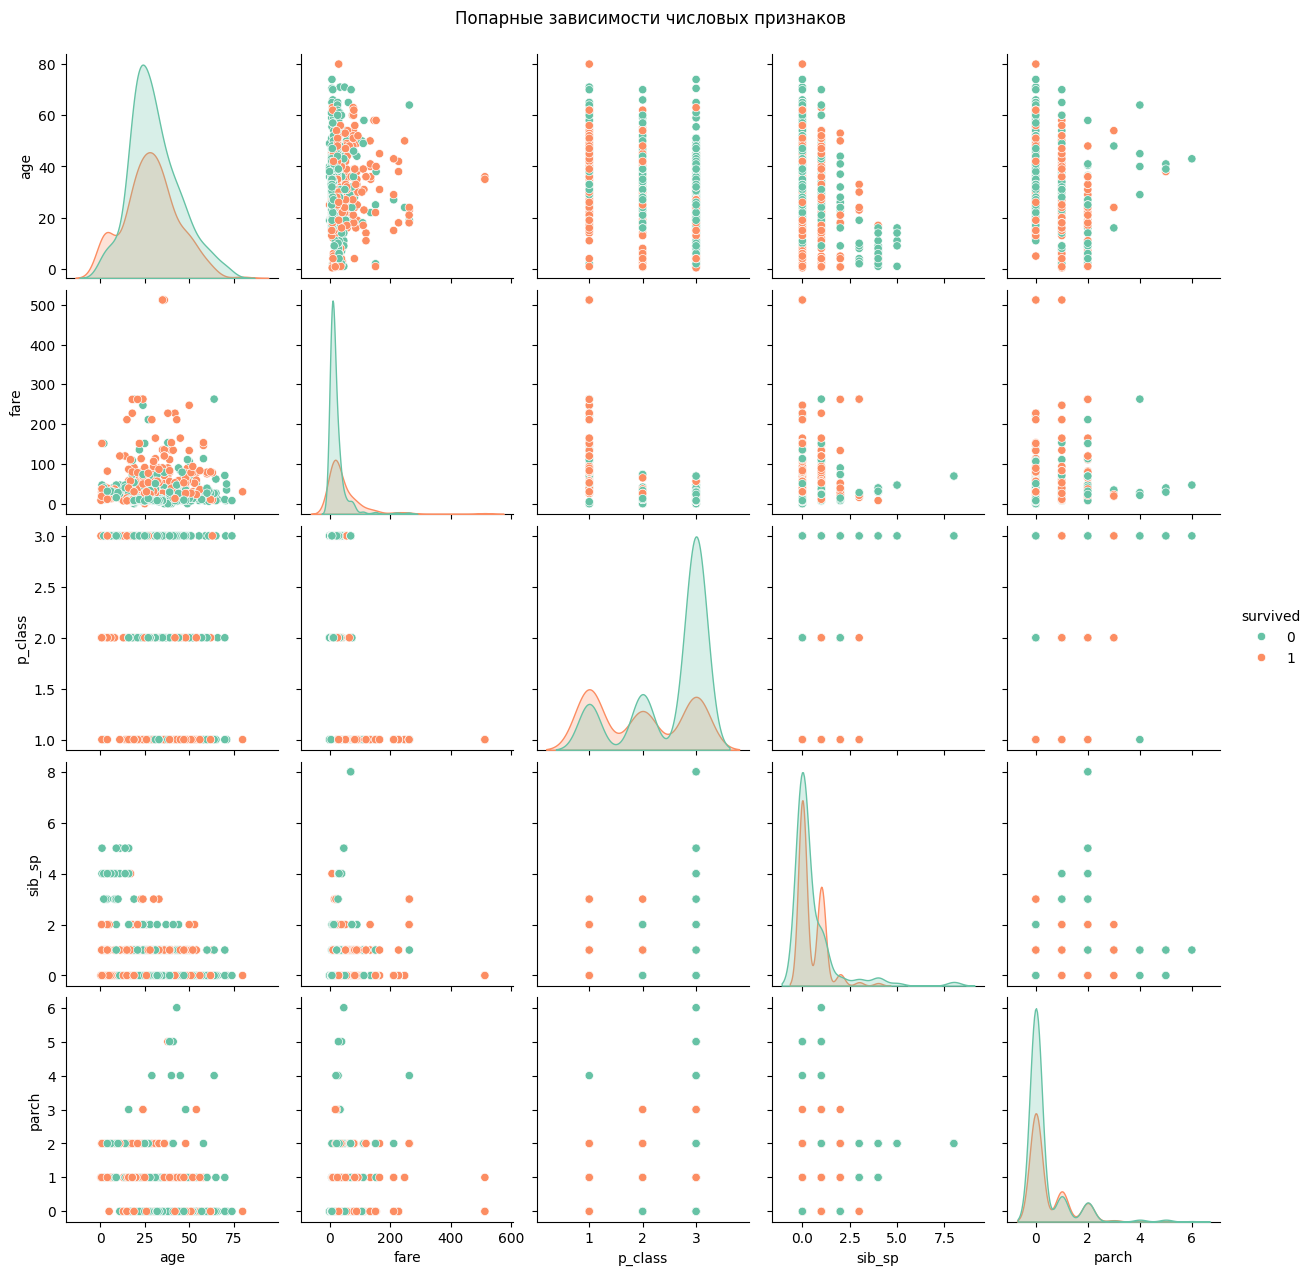

In [7]:
numeric_cols = ['age', 'fare', 'p_class', 'sib_sp', 'parch']

sns.pairplot(
    data=data[numeric_cols + ['survived']],
    hue="survived",
    palette="Set2",
    diag_kind="kde",
    height=2.5
)

plt.suptitle("Попарные зависимости числовых признаков", y=1.02)
plt.show()

### Визуально отмечаем:
- выраженную зависимость между классом и выживаемостью (только у первого класса доля выживших выше чем погибших, а у третьего доля погибших значительно выше, второй класс занимает промежуточное положение)
- аналгичная, но менее визуально заметная зависимость наблюдается в отношении стоимости билета
- у третьего больш всего родственников на борту, путешествовали большими семьями 

### Построим матрицу корреляции для того, чтобы проверить наши догадки по предыдущему разделу

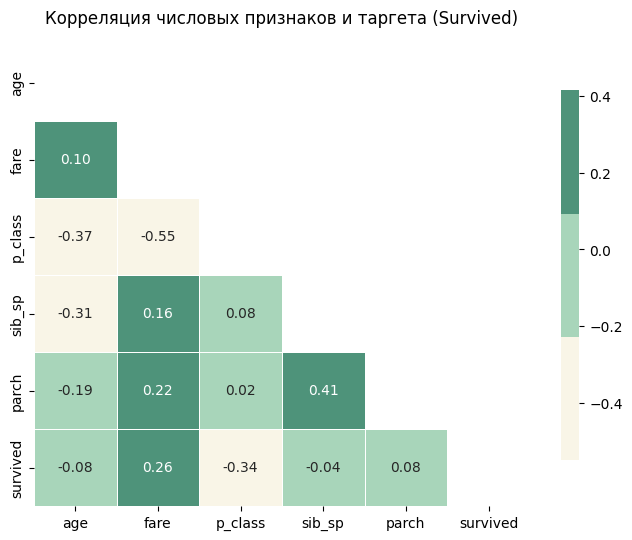

In [8]:
numeric_cols = ['age', 'fare', 'p_class', 'sib_sp', 'parch']

corr = data[numeric_cols + ['survived']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

custom_cmap = sns.color_palette(["#f9f5e7", "#a8d5ba", "#4e937a"])

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    mask=mask,
    cmap=custom_cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Корреляция числовых признаков и таргета (Survived)", pad=15)
plt.show()


#### В целом догадки подвердили и наиболее высокая зависимость таргета наблюдается от класса 

При этом не обнаружено высоких (по модулю) значений корреляций между признакми, поэтому данные подходят для обучения даже линейных моделей 

#### Далее посмотрим зависимость таргета от пола (признак категориалоьный и ранее в графиках не рассматривался) 

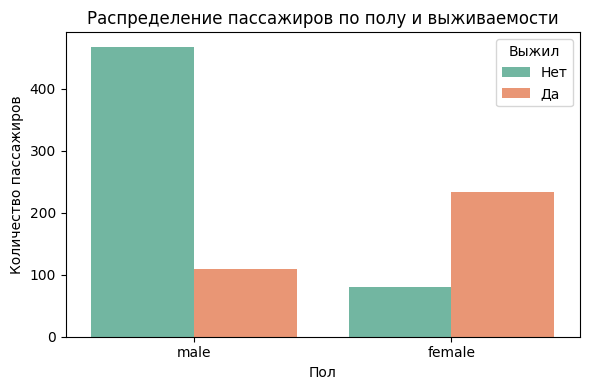

In [9]:
plt.figure(figsize=(6, 4))

sns.countplot(
    data=data,
    x='sex',
    hue='survived',
    palette='Set2'
)

plt.title('Распределение пассажиров по полу и выживаемости')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')

plt.legend(title='Выжил', labels=['Нет', 'Да'], loc='upper right')

plt.tight_layout()
plt.show()

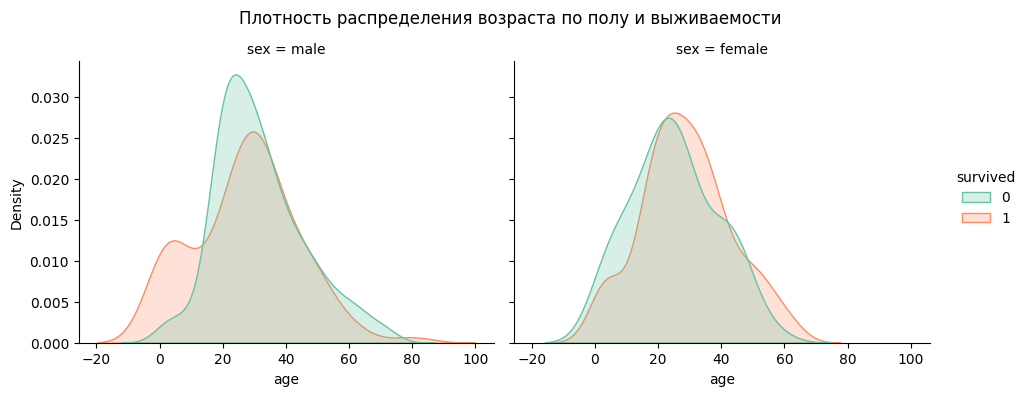

In [10]:
sns.displot(
    data=data,
    x='age',
    hue='survived',
    col='sex',
    kind='kde',
    fill=True,
    palette='Set2',
    height=4,
    aspect=1.2,
    common_norm=False  # важно: чтобы распределения не нормировались вместе
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Плотность распределения возраста по полу и выживаемости')
plt.show()

#### Отмечаем что у женщин доля выживших намного выше, чем у мужчин

### Посмотрим боксплоты по числовым данным

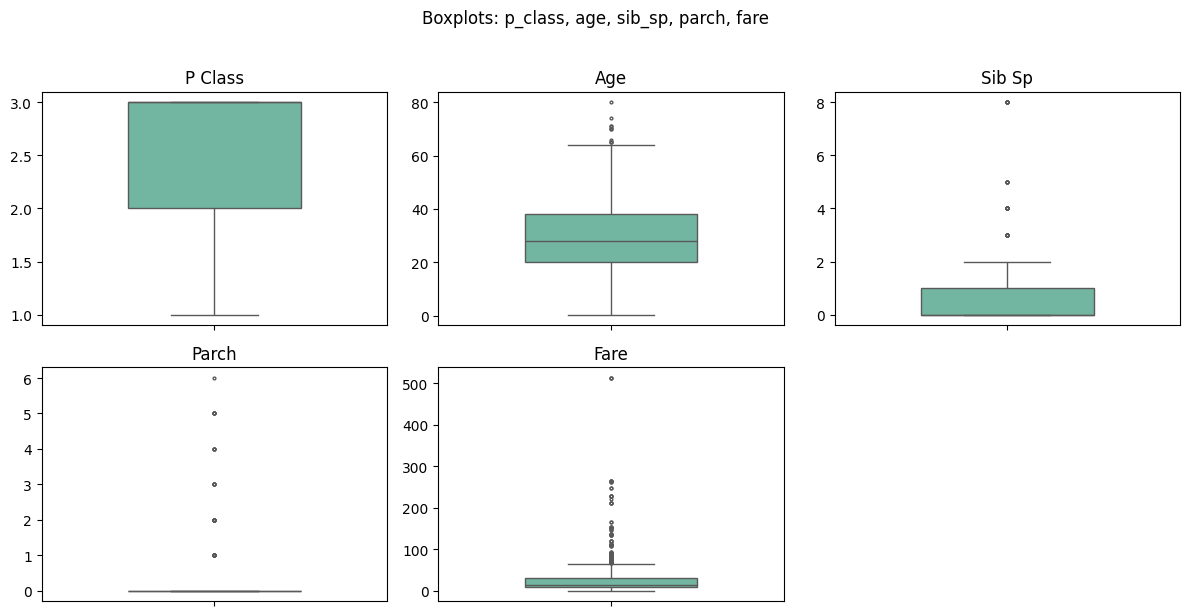

In [11]:
cols = ['p_class', 'age', 'sib_sp', 'parch', 'fare']

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

for i, c in enumerate(cols):
    sns.boxplot(
        data=data,
        y=c,
        ax=axes[i],
        color=sns.color_palette("Set2")[0],
        width=0.5,
        fliersize=2,
        linewidth=1
    )
    axes[i].set_title(c.replace('_', ' ').title())
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        axes[j].axis('off')

plt.suptitle('Boxplots: p_class, age, sib_sp, parch, fare', y=1.02)
plt.tight_layout()
plt.show()


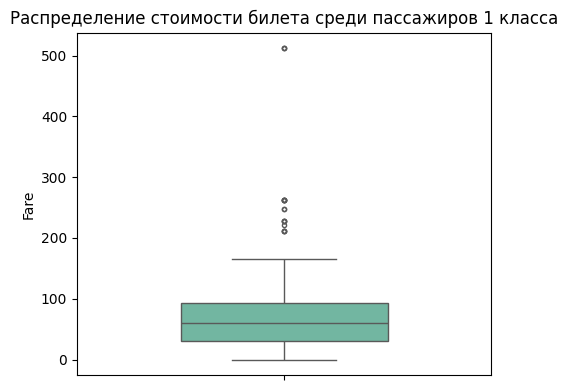

In [12]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=data[data.p_class == 1],
    y='fare',
    color=sns.color_palette("Set2")[0],
    width=0.5,
    fliersize=3,
    linewidth=1
)

plt.title('Распределение стоимости билета среди пассажиров 1 класса')
plt.ylabel('Fare')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [13]:
first_class = data[data.p_class == 1]

q1 = first_class['fare'].quantile(0.25)
q3 = first_class['fare'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = first_class[
    (first_class['fare'] < lower_bound) | (first_class['fare'] > upper_bound)
]

n_outliers = outliers.shape[0]
total = first_class.shape[0]
share = n_outliers / total * 100

display('Количество выбросов в 1 классе =',  total)
display('Доля выбросов в 1 классе =',  share)

'Количество выбросов в 1 классе ='

216

'Доля выбросов в 1 классе ='

9.25925925925926

#### Среди пассажиров первого класса есть 216 со стоимостью проезда, которую можно отнести к выбросам 
Учитывая, что экстра дорогие каюты, действительно существуют. Считаем, что это не аномалия в данных, а особенность распредления, представленного в данных.


## Вывод:
- имеем небольшой датасет 891 строка
- в данных есть дискретные, числовые и категориальные типы данных
- таргет столбце survived бинарный то есть предстоит задача бинарной классификации
- доля положительного таргетного класса (1) 0.(38)
- имеются пропуски в столбцах age, cabin, embarked
- данные подходят для обучения в том числе линейных моделей
- отмечена высокая зависимость таргета от признака p_class, также повышает вероятность класса 1
  sex = female
- в признаке fare есть выбросы, связанные с индивидуальными очень дорогими билетами. Выбросы в остальных признаках могут быть объяснены небольшим количеством семей с большим количеством детей/родственников и большим количеством одиноко путешествующих.

# Предобработка данных

In [14]:
try:
    data = data.drop('id', axis=1)
except:
    pass
data.sample()

survived  p_class                 name   sex   age  sib_sp  parch ticket  \
179         0        3  Leonard, Mr. Lionel  male  36.0       0      0   LINE   

     fare cabin embarked  
179   0.0   NaN        S

### Посмотрим визуально, что представляет из себя столбец cabin, чтобы принять решение о том, что делать с пропусками

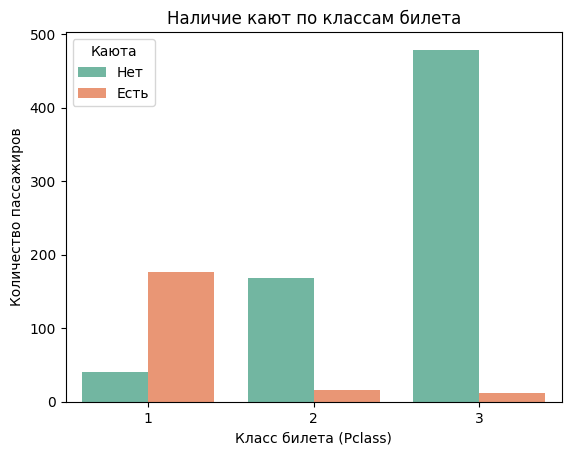

In [15]:
tmp = data.copy()
tmp['has_cabin'] = np.where(tmp.cabin.notnull(), 1, 0)

sns.countplot(
    data=tmp,
    x='p_class',
    hue='has_cabin',
    palette="Set2",
)
plt.title('Наличие кают по классам билета')
plt.xlabel('Класс билета (Pclass)')
plt.ylabel('Количество пассажиров')
plt.legend(title='Каюта', labels=['Нет', 'Есть'])
plt.show()

### Судя по графику, каюты были у наиболее обеспеченной части пассажиров. Третий класс был в общих помещениях. То есть пропуски в данном столбце в большинстве своем это не ошщибки в данных, а объективный критерий

Принимаем решение, удалить столбец каюты и просто оставить бинарный признак есть каюта или нет. При этом всему первому классу установим признак что каюта имеется. Сам номер каюты, если он есть, уникален и предсказательную способность не должен увеличить.

In [16]:
data['has_cabin'] = np.where(data.cabin.notnull() | data.p_class==1, 1, 0)
data = data.drop('cabin', axis=1)
data.sample(3)

survived  p_class                        name     sex   age  sib_sp  \
491         0        3         Windelov, Mr. Einar    male  21.0       0   
634         0        3          Skoog, Miss. Mabel  female   9.0       3   
206         0        3  Backstrom, Mr. Karl Alfred    male  32.0       1   

     parch            ticket   fare embarked  has_cabin  
491      0  SOTON/OQ 3101317   7.25        S          1  
634      2            347088  27.90        S          1  
206      0           3101278  15.85        S          1

### Ознакомимся с признаком age для принятия решения об обработке пропусков в нем

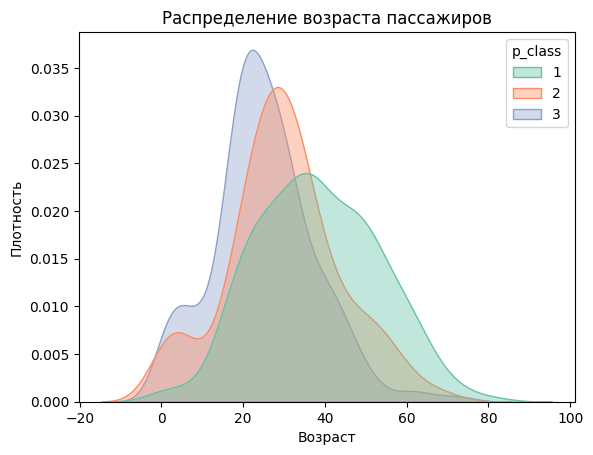

In [17]:
tmp = data.copy()

tmp['age_filled'] = tmp['age'].fillna(0)

tmp['age_is_missing'] = tmp['age'].isna().astype(int)

sns.kdeplot(
    data=tmp[tmp['age_filled'] > 0],
    x='age_filled',
    hue='p_class',
    common_norm=False,
    fill=True,
    palette='Set2',
    alpha=0.4
)


plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

#### Видим, что плотность распределения возраста разная для пассажиров разного класса

Заполним возраст, там где он пропущен, медианной по классу пассжиров

In [18]:
data.groupby('p_class')['age'].median()

p_class
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

In [19]:
(data[(data.p_class == 1) & (data.age.notna())]['age']).median()

37.0

In [20]:
data.age = data.age.fillna(
    data.groupby('p_class')['age'].transform('median')
)

display(data.info())
data.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   survived   891 non-null    int64  
 1   p_class    891 non-null    int64  
 2   name       891 non-null    object 
 3   sex        891 non-null    object 
 4   age        891 non-null    float64
 5   sib_sp     891 non-null    int64  
 6   parch      891 non-null    int64  
 7   ticket     891 non-null    object 
 8   fare       891 non-null    float64
 9   embarked   889 non-null    object 
 10  has_cabin  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

survived  p_class                                          name     sex  \
822         0        1               Reuchlin, Jonkheer. John George    male   
469         1        3                 Baclini, Miss. Helene Barbara  female   
473         1        2  Jerwan, Mrs. Amin S (Marie Marthe Thuillard)  female   

       age  sib_sp  parch           ticket     fare embarked  has_cabin  
822  38.00       0      0            19972   0.0000        S          1  
469   0.75       2      1             2666  19.2583        C          1  
473  23.00       0      0  SC/AH Basle 541  13.7917        C          1

### Пропущенные значения остались только в столбце embarked.

Это порт погрузки, заполним его просто значеним 'un'

In [21]:
data.embarked = data.embarked.fillna('un')

display(data.info())
data.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   survived   891 non-null    int64  
 1   p_class    891 non-null    int64  
 2   name       891 non-null    object 
 3   sex        891 non-null    object 
 4   age        891 non-null    float64
 5   sib_sp     891 non-null    int64  
 6   parch      891 non-null    int64  
 7   ticket     891 non-null    object 
 8   fare       891 non-null    float64
 9   embarked   891 non-null    object 
 10  has_cabin  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

survived  p_class                                     name     sex   age  \
678         0        3  Goodwin, Mrs. Frederick (Augusta Tyler)  female  43.0   
248         1        1            Beckwith, Mr. Richard Leonard    male  37.0   
568         0        3                      Doharr, Mr. Tannous    male  24.0   

     sib_sp  parch   ticket     fare embarked  has_cabin  
678       1      6  CA 2144  46.9000        S          1  
248       1      1    11751  52.5542        S          1  
568       0      0     2686   7.2292        C          1

#### Принимаем решение удалить признак name
- он индивидуален и не несет сам по себе смысла для наших целей,
- вычленять из него доп признак наличие/отсуствие мужа  (по Mrs/Miss) некорректно, так как наличие мужа как такового не гарантирует его наличие на корабле в путешествии (аналогично с титулами мужчин)

#### Принимаем решение удалить признак ticket
- принадлежность класса можно установить по другим признакам, а сам посебе признак содержит уникальное значение, не влияющее на предсказание

### Принимаем решение удалить признак id
- он не несет для нас смысла, так как четко привязан к конкретному человеку и не увеличит предсказательную способность модели

#### Признак пола заменим на 0 (женщины) и 1 (мужчины)

In [22]:
try:
    data = data.drop(['ticket', 'name', 'id'],axis=1)
except:
    pass

data.sex = np.where(data.sex=='male', 1, 0)

data.sample()

survived  p_class                             name  sex  age  sib_sp  \
10         1        3  Sandstrom, Miss. Marguerite Rut    0  4.0       1   

    parch   ticket  fare embarked  has_cabin  
10      1  PP 9549  16.7        S          1

### На основе столбцов sib_sp и parch сгенерируем столбцы is_alone и family_size и сразу визуально посмотрим влияет ли это на таргет

In [23]:
data['family_size'] = data.sib_sp + data.parch + 1
data['is_alone'] = np.where(data.family_size==1, 1, 0)

data.sample()

survived  p_class                        name  sex   age  sib_sp  parch  \
342         0        2  Collander, Mr. Erik Gustaf    1  28.0       0      0   

     ticket  fare embarked  has_cabin  family_size  is_alone  
342  248740  13.0        S          1            1         1

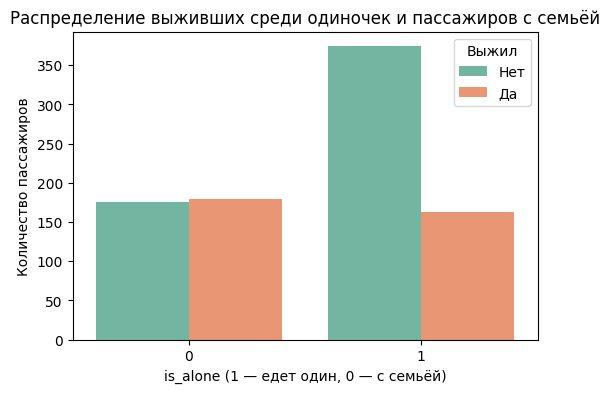

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=data,
    x='is_alone',
    hue='survived',
    palette='Set2'
)

plt.title('Распределение выживших среди одиночек и пассажиров с семьёй')
plt.xlabel('is_alone (1 — едет один, 0 — с семьёй)')
plt.ylabel('Количество пассажиров')

plt.legend(
    title='Выжил',
    labels=['Нет', 'Да'],
    loc='upper right'
)
plt.show()

### Вывод:
- подготовили данные для обучения моделей
- заполнили пропуски
- удалили неактуальные стобцы
- сгенерировали два дополнтительных признака is_alone и family_size